## Final Project Submission

Please fill out: 
* Student name: Vinayak Modgil
* Student pace: self paced / part time / full time : Full Time
* Scheduled project review date/time: 21 March, 2021/11:59PM
* Instructor name: James Irving
* Blog post URL: TBD


## Microsoft enters the movie market

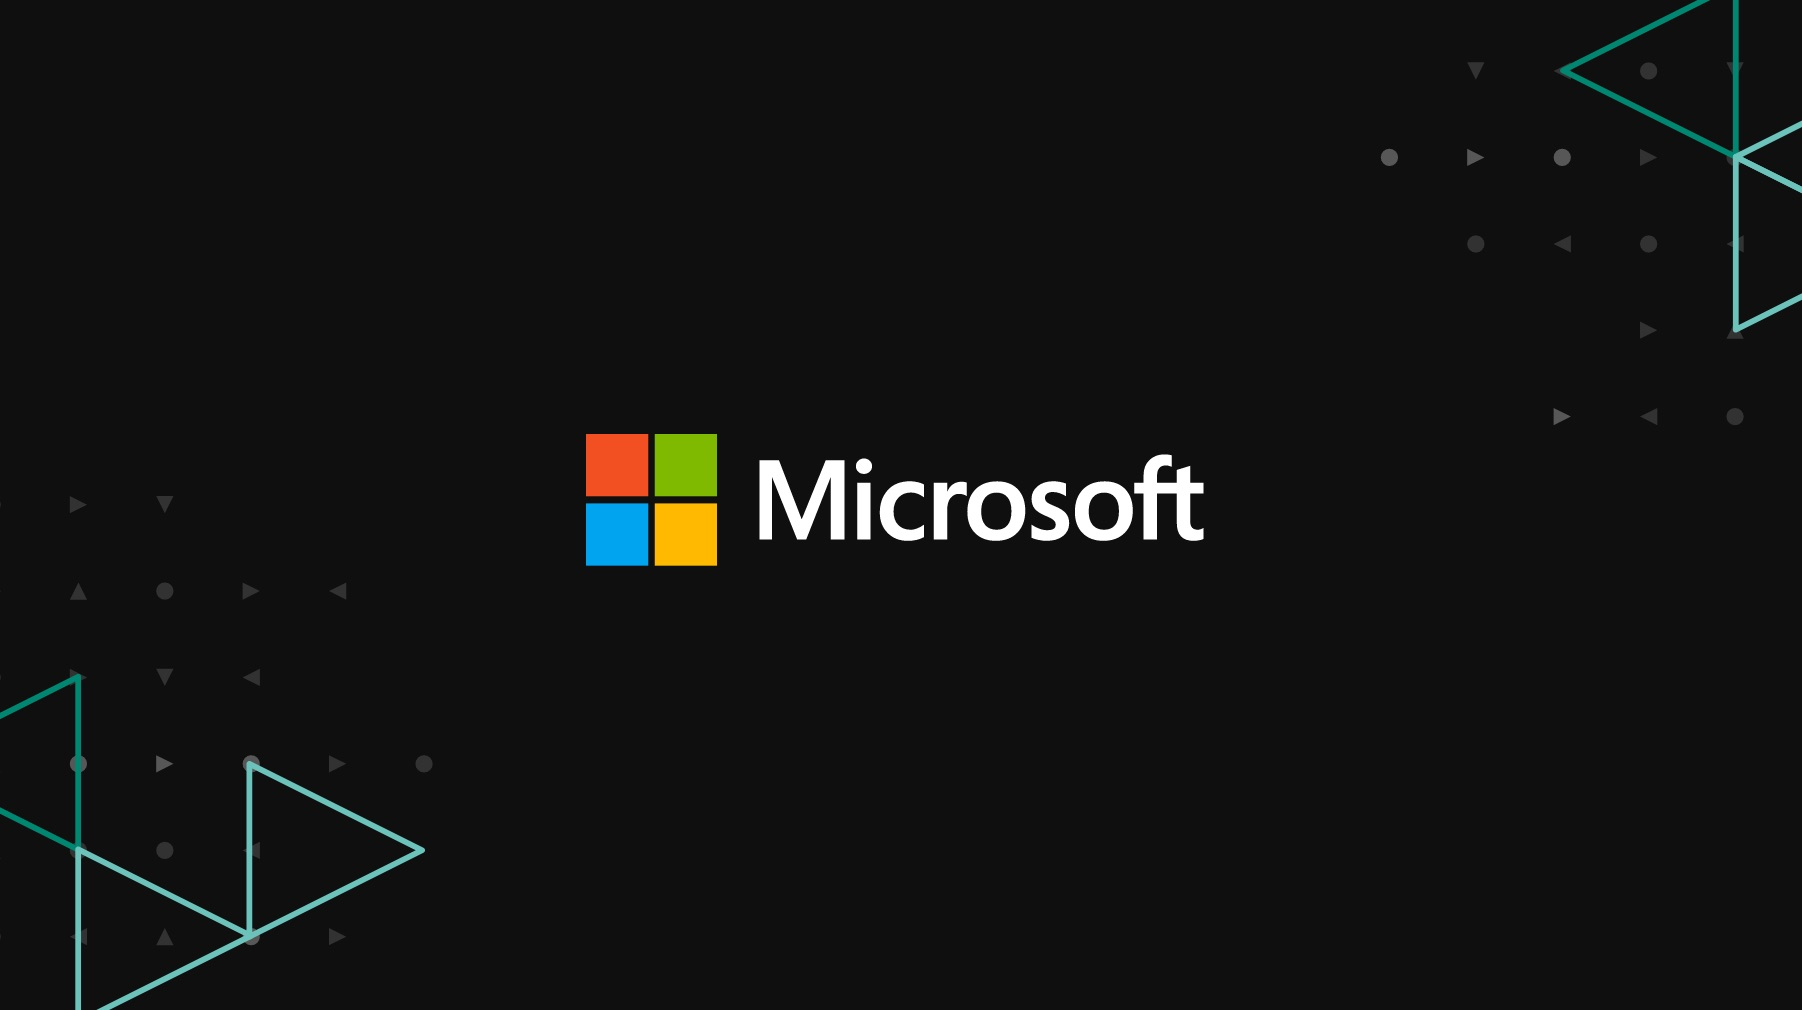

## Overview
This is a project that uses Exploratory Data Analysis to help help Microsoft make decisions based on what movies to produce on their brand new venture Microsoft Movie Studio.

## Business Problem
Venturing into the movie market, Microsoft has a choice of making original video content just like Netflix and Hulu does. As a beginner in this industry, Microsoft needs to find out the recent trends in the movie industry, and the popularity of movies as seen on IMDB, Rotten Tomotoes and TMDB. The solution is to analyse the data and help the head of Microsoft’s new movie studio to make business decisions.

## Data Understanding

#### Importing Libraries

In [365]:
# Your code here - remember to use markdown cells for comments as well!
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from IPython.display import SVG
from matplotlib.ticker import FuncFormatter
%matplotlib inline
sns.set_style("darkgrid")

#### Importing Datasets

In [366]:
movie_gross_df = pd.read_csv(r"C:\Users\Vinayak Modgil\Documents\Flatiron\dsc-phase-1-project\zippedData\bom.movie_gross.csv.gz", compression='gzip')
imdb_name_basics_df = pd.read_csv(r"C:\Users\Vinayak Modgil\Documents\Flatiron\dsc-phase-1-project\zippedData\imdb.name.basics.csv.gz", compression="gzip")
imdb_title_akas_df =  pd.read_csv(r"C:\Users\Vinayak Modgil\Documents\Flatiron\dsc-phase-1-project\zippedData\imdb.title.akas.csv.gz", compression="gzip")
imdb_title_basics_df =  pd.read_csv(r"C:\Users\Vinayak Modgil\Documents\Flatiron\dsc-phase-1-project\zippedData\imdb.title.basics.csv.gz", compression="gzip")
imdb_title_crew_df =  pd.read_csv(r"C:\Users\Vinayak Modgil\Documents\Flatiron\dsc-phase-1-project\zippedData\imdb.title.crew.csv.gz", compression="gzip")
imdb_title_principals_df =  pd.read_csv(r"C:\Users\Vinayak Modgil\Documents\Flatiron\dsc-phase-1-project\zippedData\imdb.title.principals.csv.gz", compression="gzip")
imdb_title_ratings_df =  pd.read_csv(r"C:\Users\Vinayak Modgil\Documents\Flatiron\dsc-phase-1-project\zippedData\imdb.title.ratings.csv.gz", compression="gzip")
rt_movie_info_df = pd.read_csv(r"C:\Users\Vinayak Modgil\Documents\Flatiron\dsc-phase-1-project\zippedData\rt.movie_info.tsv.gz", compression="gzip", delimiter="\t")
tmdb_movies_df =  pd.read_csv(r"C:\Users\Vinayak Modgil\Documents\Flatiron\dsc-phase-1-project\zippedData\tmdb.movies.csv.gz", compression="gzip")
tn_movie_budgets_df = pd.read_csv(r"C:\Users\Vinayak Modgil\Documents\Flatiron\dsc-phase-1-project\zippedData\tn.movie_budgets.csv.gz", compression="gzip")
rt_reviews_df = pd.read_csv(r"C:\Users\Vinayak Modgil\Documents\Flatiron\dsc-phase-1-project\zippedData\rt.reviews.tsv.gz", compression="gzip", delimiter = "\t", encoding = "latin1")

#### Movie gross

In [367]:
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


#### IMDB title basics

In [368]:
imdb_title_basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


#### IMDB title ratings

In [369]:
imdb_title_ratings_df

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


#### TN movie budgets

In [370]:
tn_movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


#### TMDB movies

In [371]:
tmdb_movies_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


#### RT movie info

In [372]:
rt_movie_info_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


## Data Preparation

### Merging Datasets

#### Merging 5.0.3 and 5.0.7

In [373]:
df1 = pd.merge(movie_gross_df, tn_movie_budgets_df, left_on="title",right_on="movie", how="inner")
df1

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100"
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",Ben is Back,"$13,000,000","$3,703,182","$9,633,111"
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599"
1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,"$6,000,000","$1,214,525","$1,427,656"


#### Merging 5.0.4 and 5.0.5

In [374]:
imdb_merge_df = pd.merge(imdb_title_basics_df, imdb_title_ratings_df,left_on = "tconst", right_on="tconst", how="inner")
imdb_merge_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


#### Slicing df1 

In [375]:
recent_movies = df1.loc[df1["year"] >= 2014]
recent_movies

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
636,Transformers: Age of Extinction,Par.,245400000.0,858600000,2014,37,"Jun 27, 2014",Transformers: Age of Extinction,"$210,000,000","$245,439,076","$1,104,039,076"
637,The Hobbit: The Battle of the Five Armies,WB (NL),255100000.0,700900000,2014,22,"Dec 17, 2014",The Hobbit: The Battle of the Five Armies,"$250,000,000","$255,119,788","$945,577,621"
638,Guardians of the Galaxy,BV,333200000.0,440200000,2014,14,"Aug 1, 2014",Guardians of the Galaxy,"$170,000,000","$333,172,112","$770,867,516"
639,Maleficent,BV,241400000.0,517100000,2014,84,"May 30, 2014",Maleficent,"$180,000,000","$241,407,328","$758,536,735"
640,The Hunger Games: Mockingjay - Part 1,LGF,337100000.0,418200000,2014,62,"Nov 21, 2014",The Hunger Games: Mockingjay - Part 1,"$125,000,000","$337,135,885","$766,575,131"
...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100"
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",Ben is Back,"$13,000,000","$3,703,182","$9,633,111"
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599"
1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,"$6,000,000","$1,214,525","$1,427,656"


#### Slicing imdb_recent_movies

In [376]:
imdb_recent_movies = imdb_merge_df.loc[imdb_merge_df["start_year"] >= 2014]
imdb_recent_movies

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


#### Final Merge

In [377]:
project_df = pd.merge(recent_movies, imdb_recent_movies, left_on="title", right_on="original_title", how="inner")
project_df

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Transformers: Age of Extinction,Par.,245400000.0,858600000,2014,37,"Jun 27, 2014",Transformers: Age of Extinction,"$210,000,000","$245,439,076","$1,104,039,076",tt2109248,Transformers: Age of Extinction,Transformers: Age of Extinction,2014,165.0,"Action,Adventure,Sci-Fi",5.7,283486
1,The Hobbit: The Battle of the Five Armies,WB (NL),255100000.0,700900000,2014,22,"Dec 17, 2014",The Hobbit: The Battle of the Five Armies,"$250,000,000","$255,119,788","$945,577,621",tt2310332,The Hobbit: The Battle of the Five Armies,The Hobbit: The Battle of the Five Armies,2014,144.0,"Adventure,Fantasy",7.4,438621
2,Guardians of the Galaxy,BV,333200000.0,440200000,2014,14,"Aug 1, 2014",Guardians of the Galaxy,"$170,000,000","$333,172,112","$770,867,516",tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",8.1,948394
3,Maleficent,BV,241400000.0,517100000,2014,84,"May 30, 2014",Maleficent,"$180,000,000","$241,407,328","$758,536,735",tt1587310,Maleficent,Maleficent,2014,97.0,"Action,Adventure,Family",7.0,305832
4,The Hunger Games: Mockingjay - Part 1,LGF,337100000.0,418200000,2014,62,"Nov 21, 2014",The Hunger Games: Mockingjay - Part 1,"$125,000,000","$337,135,885","$766,575,131",tt1951265,The Hunger Games: Mockingjay - Part 1,The Hunger Games: Mockingjay - Part 1,2014,123.0,"Action,Adventure,Sci-Fi",6.6,379050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100",tt1801552,Gotti,Gotti,2018,112.0,"Biography,Crime,Drama",4.8,10358
641,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599",tt3576728,Bilal: A New Breed of Hero,Bilal: A New Breed of Hero,2015,105.0,"Action,Adventure,Animation",8.0,16854
642,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,"$6,000,000","$1,214,525","$1,427,656",tt4995858,Mandy,Mandy,2016,113.0,"Drama,Thriller",4.1,39
643,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,"$6,000,000","$1,214,525","$1,427,656",tt6998518,Mandy,Mandy,2018,121.0,"Action,Fantasy,Horror",6.6,44378


### Data Cleaning

In [378]:
project_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 0 to 644
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              645 non-null    object 
 1   studio             645 non-null    object 
 2   domestic_gross_x   645 non-null    float64
 3   foreign_gross      541 non-null    object 
 4   year               645 non-null    int64  
 5   id                 645 non-null    int64  
 6   release_date       645 non-null    object 
 7   movie              645 non-null    object 
 8   production_budget  645 non-null    object 
 9   domestic_gross_y   645 non-null    object 
 10  worldwide_gross    645 non-null    object 
 11  tconst             645 non-null    object 
 12  primary_title      645 non-null    object 
 13  original_title     645 non-null    object 
 14  start_year         645 non-null    int64  
 15  runtime_minutes    637 non-null    float64
 16  genres             644 non

In [379]:
project_df["domestic_gross_y"] = project_df["domestic_gross_y"].map(lambda x: x.replace(",", ""))
project_df["domestic_gross_y"] = project_df["domestic_gross_y"].map(lambda x: x.replace("$", ""))
project_df["domestic_gross_y"] = project_df["domestic_gross_y"].astype("int64")
project_df["worldwide_gross"] = project_df["worldwide_gross"].map(lambda x: x.replace(",", ""))
project_df["worldwide_gross"] = project_df["worldwide_gross"].map(lambda x: x.replace("$", ""))
project_df["worldwide_gross"] = project_df["worldwide_gross"].astype("int64")
project_df["production_budget"] = project_df["production_budget"].map(lambda x: x.replace(",", ""))
project_df["production_budget"] = project_df["production_budget"].map(lambda x: x.replace("$", ""))
project_df["production_budget"] = project_df["production_budget"].astype("int64")

In [380]:
project_df["runtime_minutes"] = project_df["runtime_minutes"].fillna(imdb_recent_movies["runtime_minutes"].median())
project_df["genres"] = project_df["genres"].fillna("Missing")

In [381]:
project_df["genres"] = project_df["genres"].map(lambda x: x.split(","))

In [382]:
project_df["foreign_gross"] = project_df["foreign_gross"].astype("str")
project_df["foreign_gross"] = project_df["foreign_gross"].map(lambda x: x.replace(",", ""))
project_df["foreign_gross"] = project_df["foreign_gross"].fillna("missing")

In [383]:
project_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 0 to 644
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              645 non-null    object 
 1   studio             645 non-null    object 
 2   domestic_gross_x   645 non-null    float64
 3   foreign_gross      645 non-null    object 
 4   year               645 non-null    int64  
 5   id                 645 non-null    int64  
 6   release_date       645 non-null    object 
 7   movie              645 non-null    object 
 8   production_budget  645 non-null    int64  
 9   domestic_gross_y   645 non-null    int64  
 10  worldwide_gross    645 non-null    int64  
 11  tconst             645 non-null    object 
 12  primary_title      645 non-null    object 
 13  original_title     645 non-null    object 
 14  start_year         645 non-null    int64  
 15  runtime_minutes    645 non-null    float64
 16  genres             645 non

### Feature Engineering

In [384]:
project_df["Profit"] = (project_df["worldwide_gross"] - project_df["production_budget"])
project_df["movie_size"] = project_df["runtime_minutes"].map(lambda x: "Long (150mins or above)" if x >=150 else ("Short (100 mins or below)" if x <= 100 else "Medium ( b/w 100 and 150 mins)"))
project_df["rating_type"] = project_df["averagerating"].map(lambda x: "High" if x >= 8 else ("Low" if x <= 6 else "Medium"))
project_df["ROI"] = (project_df["Profit"] / project_df["production_budget"]) * 100

## Analysis

#### Worldwide/Domestic gross

In [385]:
project_df

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,...,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Profit,movie_size,rating_type,ROI
0,Transformers: Age of Extinction,Par.,245400000.0,858600000,2014,37,"Jun 27, 2014",Transformers: Age of Extinction,210000000,245439076,...,Transformers: Age of Extinction,2014,165.0,"[Action, Adventure, Sci-Fi]",5.7,283486,894039076,Long (150mins or above),Low,425.732893
1,The Hobbit: The Battle of the Five Armies,WB (NL),255100000.0,700900000,2014,22,"Dec 17, 2014",The Hobbit: The Battle of the Five Armies,250000000,255119788,...,The Hobbit: The Battle of the Five Armies,2014,144.0,"[Adventure, Fantasy]",7.4,438621,695577621,Medium ( b/w 100 and 150 mins),Medium,278.231048
2,Guardians of the Galaxy,BV,333200000.0,440200000,2014,14,"Aug 1, 2014",Guardians of the Galaxy,170000000,333172112,...,Guardians of the Galaxy,2014,121.0,"[Action, Adventure, Comedy]",8.1,948394,600867516,Medium ( b/w 100 and 150 mins),High,353.451480
3,Maleficent,BV,241400000.0,517100000,2014,84,"May 30, 2014",Maleficent,180000000,241407328,...,Maleficent,2014,97.0,"[Action, Adventure, Family]",7.0,305832,578536735,Short (100 mins or below),Medium,321.409297
4,The Hunger Games: Mockingjay - Part 1,LGF,337100000.0,418200000,2014,62,"Nov 21, 2014",The Hunger Games: Mockingjay - Part 1,125000000,337135885,...,The Hunger Games: Mockingjay - Part 1,2014,123.0,"[Action, Adventure, Sci-Fi]",6.6,379050,641575131,Medium ( b/w 100 and 150 mins),Medium,513.260105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,Gotti,VE,4300000.0,nan,2018,64,"Jun 15, 2018",Gotti,10000000,4286367,...,Gotti,2018,112.0,"[Biography, Crime, Drama]",4.8,10358,-3910900,Medium ( b/w 100 and 150 mins),Low,-39.109000
641,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000,490973,...,Bilal: A New Breed of Hero,2015,105.0,"[Action, Adventure, Animation]",8.0,16854,-29351401,Medium ( b/w 100 and 150 mins),High,-97.838003
642,Mandy,RLJ,1200000.0,nan,2018,71,"Sep 14, 2018",Mandy,6000000,1214525,...,Mandy,2016,113.0,"[Drama, Thriller]",4.1,39,-4572344,Medium ( b/w 100 and 150 mins),Low,-76.205733
643,Mandy,RLJ,1200000.0,nan,2018,71,"Sep 14, 2018",Mandy,6000000,1214525,...,Mandy,2018,121.0,"[Action, Fantasy, Horror]",6.6,44378,-4572344,Medium ( b/w 100 and 150 mins),Medium,-76.205733


In [386]:
def millions(x, pos):
    return "{:1.1f}M".format(x* 1e-6)
formatter = FuncFormatter(millions)

def thousands(x, pos):
    return "{:1.1f}K".format(x* 1e-3)
formatter1 = FuncFormatter(thousands)

def percent(x, pos):
    return "{:1.1f}%".format(x * 1e-1)
formatter2 = FuncFormatter(percent)

#### most profitable genres(domestically and internationally)

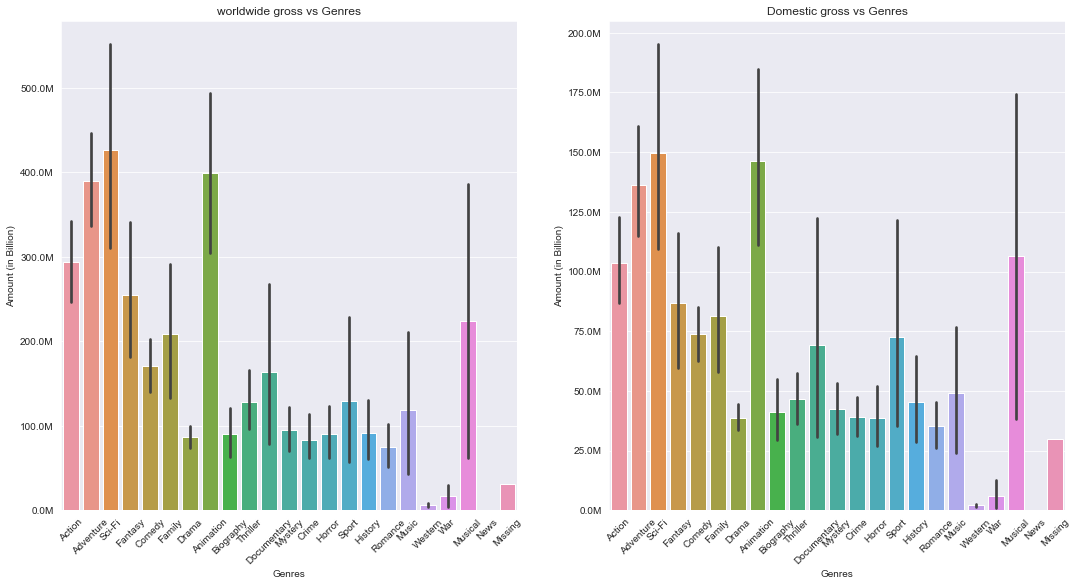

In [401]:
fig1, ax = plt.subplots(figsize=(18, 9), nrows= 1, ncols=2)

sns.barplot(x="genres", y="worldwide_gross",ax=ax[0], data=project_df.explode("genres"))
sns.barplot(x="genres", y="domestic_gross_y",ax=ax[1], data=project_df.explode("genres"))

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_xlabel("Genres")
ax[0].set_ylabel("Amount (in Billion)")
ax[0].set_title("worldwide gross vs Genres")
ax[0].yaxis.set_major_formatter(formatter)

ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_xlabel("Genres")
ax[1].set_ylabel("Amount (in Billion)")
ax[1].set_title("Domestic gross vs Genres")
ax[1].yaxis.set_major_formatter(formatter)

In [402]:
fig1.savefig("demo-figure-matplotlib.png", transparent=False, facecolor="white")

#### Trend of gross profit over the span of 5 years

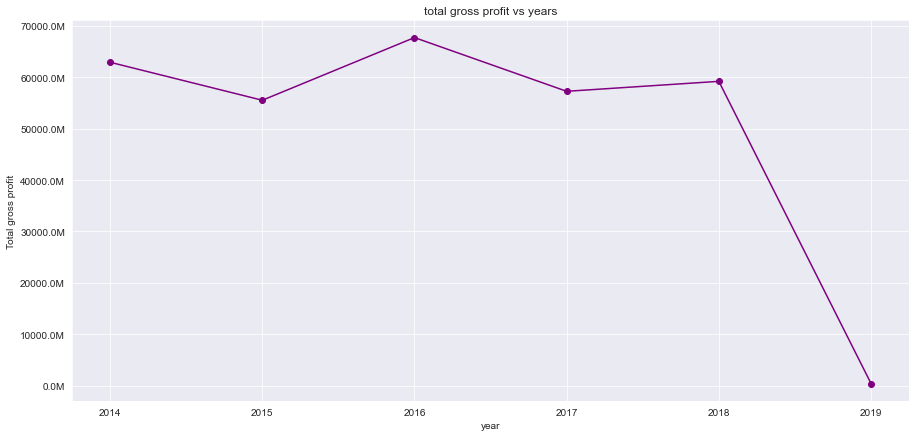

In [414]:
group1 = project_df.explode("genres").groupby("start_year").sum()
group1

fig2, ax = plt.subplots(figsize=(15, 7))
ax.plot(group1["worldwide_gross"], marker="o", linestyle="-", color="purple")
ax.set_ylabel("Total gross profit")
ax.set_xlabel("year")
ax.set_title("total gross profit vs years")
ax.yaxis.set_major_formatter(formatter)

In [415]:
fig2.savefig("demo-figure-matplotlib1.png", transparent=False, facecolor="white")

#### relationship between the length of movies and their popularity
Its seems that long movies are more popular than medium or short movies. From a business perspective longer movies should be produced in a larger quantity.

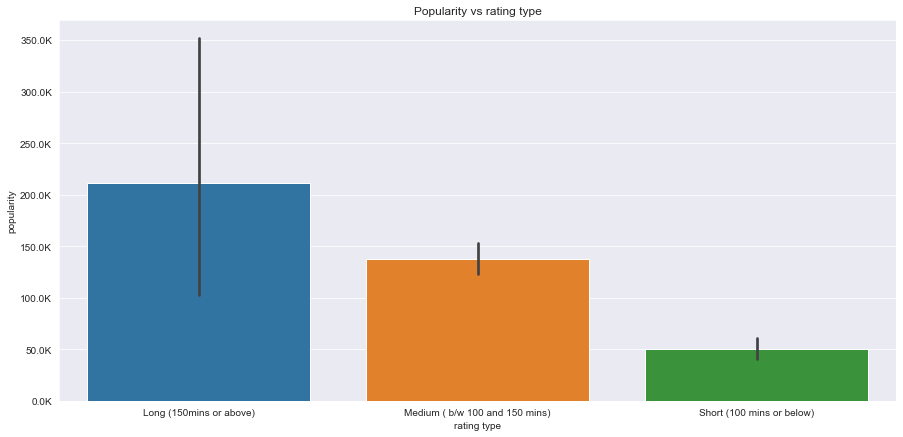

In [416]:
fig3, ax = plt.subplots(figsize=(15, 7))

sns.barplot(x="movie_size", y="numvotes",ax = ax, data=project_df)

ax.set_xlabel("rating type")
ax.set_ylabel("popularity")
ax.set_title("Popularity vs rating type")
ax.yaxis.set_major_formatter(formatter1)

In [417]:
fig3.savefig("demo-figure-matplotlib2.png", transparent=False, facecolor="white")

#### relation between worldwide gross and domestic gross
This is barely any relationship between rating and worldwide gross profit. As we can see from the jointplot, the correlation between rating and worldwide gross profit is 0.

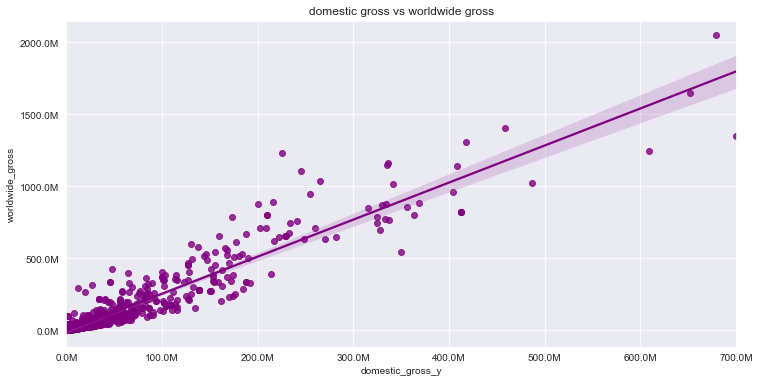

In [418]:
fig4, ax = plt.subplots(figsize=(12, 6))

sns.regplot(x="domestic_gross_y", y="worldwide_gross", data=project_df, ax=ax, color="purple")

ax.set_title("domestic gross vs worldwide gross") 
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)

In [419]:
fig4.savefig("demo-figure-matplotlib3.png", transparent=False, facecolor="white")

#### Popularity relation with profit

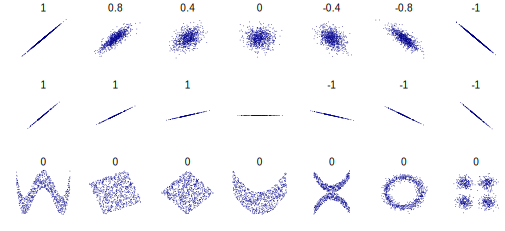

In [420]:
SVG(url="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg")

#### profit trends of different budget movies over the span of 5 years

In [421]:
high_budget_films = project_df.loc[project_df["production_budget"] >= 100000000]
medium_budget_films = project_df.loc[(project_df["production_budget"] < 100000000) & (project_df["production_budget"] >= 47000000)]
low_budget_films = project_df.loc[project_df["production_budget"] < 47000000]

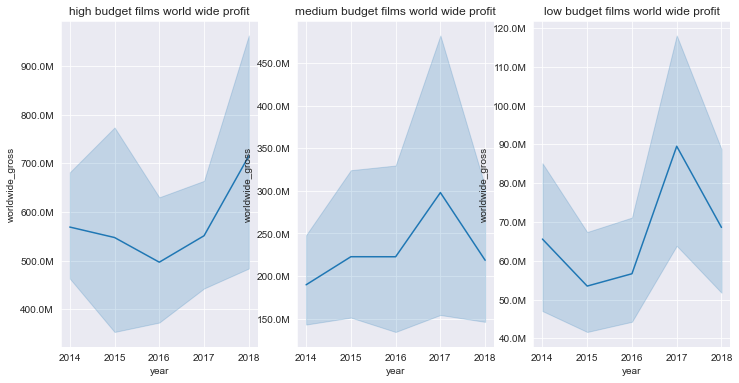

In [422]:
fig5, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

sns.lineplot(x="year", y="worldwide_gross", data=high_budget_films, ax=ax[0])
sns.lineplot(x="year", y="worldwide_gross", data=medium_budget_films, ax=ax[1])
sns.lineplot(x="year", y="worldwide_gross", data=low_budget_films, ax=ax[2])

ax[0].set_title("high budget films world wide profit")
ax[0].yaxis.set_major_formatter(formatter)

ax[1].set_title("medium budget films world wide profit")
ax[1].yaxis.set_major_formatter(formatter)

ax[2].set_title("low budget films world wide profit")
ax[2].yaxis.set_major_formatter(formatter)

In [423]:
fig5.savefig("demo-figure-matplotlib4.png", transparent=False, facecolor="white")

#### ratings vs ROI

In [424]:
high_rated_films = project_df.loc[project_df["rating_type"] == "High"]
medium_rated_films = project_df.loc[project_df["rating_type"] == "Medium"]
low_rated_films = project_df.loc[project_df["rating_type"] == "Low"]

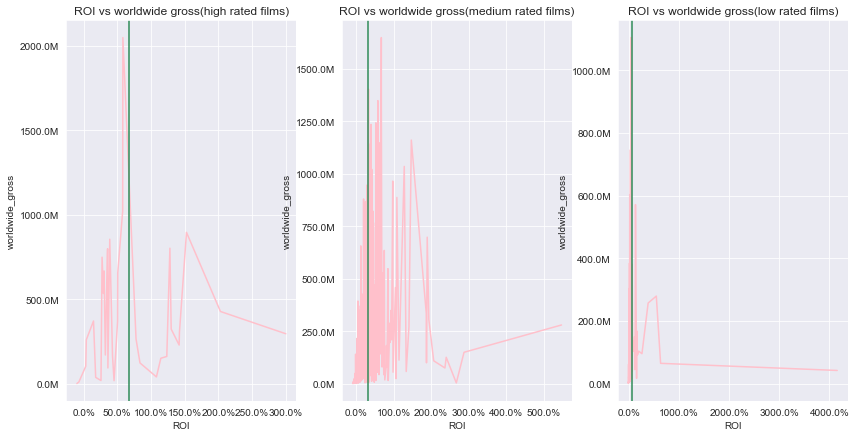

In [425]:
fig6, ax = plt.subplots(figsize=(14, 7), nrows=1, ncols=3)

sns.lineplot(x="ROI", y="worldwide_gross", data=high_rated_films, color="pink", ax=ax[0])
sns.lineplot(x="ROI", y="worldwide_gross", data=medium_rated_films, color="pink", ax=ax[1])
sns.lineplot(x="ROI", y="worldwide_gross", data=low_rated_films, color="pink", ax=ax[2])

ax[0].axvline(high_rated_films["ROI"].mean(), color="seagreen")
ax[1].axvline(medium_rated_films["ROI"].mean(), color="seagreen")
ax[2].axvline(low_rated_films["ROI"].mean(), color="seagreen")

ax[0].set_title("ROI vs worldwide gross(high rated films)")
ax[1].set_title("ROI vs worldwide gross(medium rated films)")
ax[2].set_title("ROI vs worldwide gross(low rated films)")

ax[0].xaxis.set_major_formatter(formatter2)
ax[1].xaxis.set_major_formatter(formatter2)
ax[2].xaxis.set_major_formatter(formatter2)

ax[0].yaxis.set_major_formatter(formatter)
ax[1].yaxis.set_major_formatter(formatter)
ax[2].yaxis.set_major_formatter(formatter)


In [426]:
fig6.savefig("demo-figure-matplotlib5.png", transparent=False, facecolor="white")

## Conclusions 
#### This analysis leads to three recommendations for producing original video content:
1.) Microsoft needs to invest in media companies that make content in Sci-Fi, Animation and Adventure.
2.) As seen from the trends, usually long movies are more popular and therefore Microsoft should focus on the same.
3.) As we can see that domestic gross as well as worldwide gross have a linear relationship, Microsoft will benefit the most from releasing movies both domestically and internationally.

## Next Steps:
The following steps that can be taken by Microsoft are:
1.) Improve production speed by investing more money.
2.) Take control of budget spending on popular movies.
3.) Improve worldwide gross profit by taking charge of advertisements.